In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import platform

In [2]:
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm
        #fm._rebuild()
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [3]:
# 데이터 저장 경로
data_path = '../../../data/소설'

train_path = os.path.join(data_path, 'train.csv')
test_path = os.path.join(data_path, 'test_x.csv')
sub_path = os.path.join(data_path, 'sample_submission.csv')

train = pd.read_csv(train_path, index_col=0)
test = pd.read_csv(test_path, index_col=0)
sub = pd.read_csv(sub_path, index_col=0)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54879 entries, 0 to 54878
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    54879 non-null  object
 1   author  54879 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


<AxesSubplot:xlabel='author', ylabel='count'>

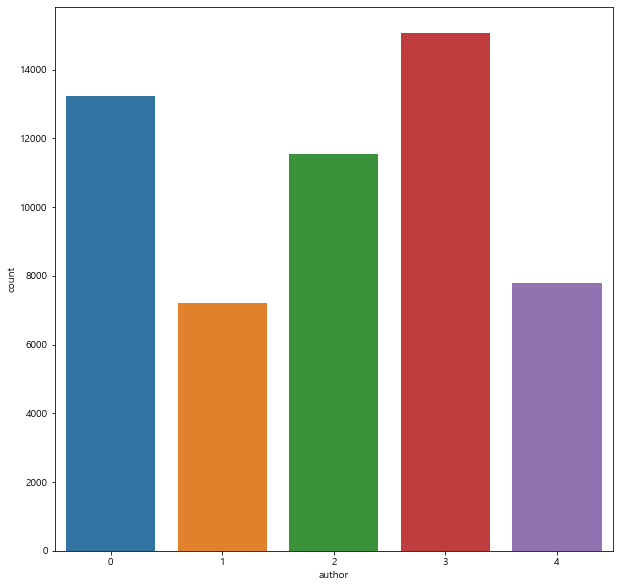

In [32]:
# label count
plt.figure(figsize=(10, 10))
sns.countplot(data=train, x='author')

In [64]:
stop_words = set(stopwords.words('english')) # 불용어 사전
reg = '[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》’;“”_]'

group = train.groupby('author')['text']
group_words = []

for i in range(5):
    print(i, '처리 중')
    final_list = []
    text_list = group.get_group(i).tolist()
    # 각 문장을 토크나이징
    for text in text_list:
        text = re.sub(reg, '', text)    # 특수문자 제거
        result = word_tokenize(text)
        # 불용어 처리
        for word in result:
            if word.lower().strip() not in stop_words:
                final_list.append(word.lower().strip())
    group_words.append(final_list)

0 처리 중
1 처리 중
2 처리 중
3 처리 중
4 처리 중


In [74]:
# 빈도 구하기
count_list = []
for words in group_words:
    count_list.append(FreqDist(words))

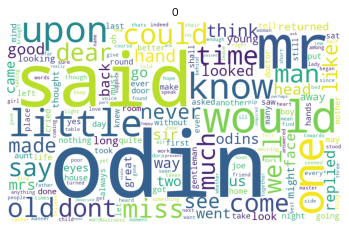

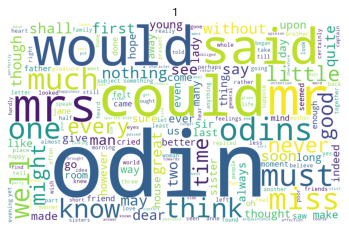

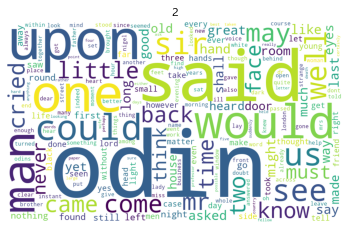

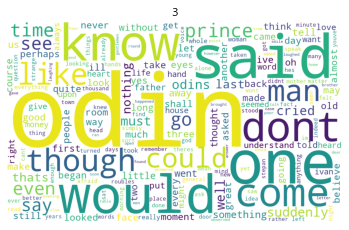

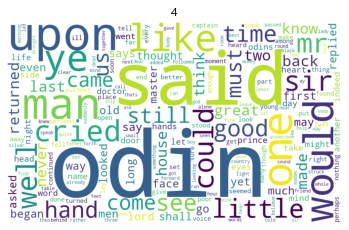

In [77]:
# 시각화
for i, count in enumerate(count_list):
    wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
    plt.imshow(wc.generate_from_frequencies(count))
    plt.axis("off")
    plt.title(i)
    plt.show()